<a href="https://colab.research.google.com/github/wvcode/analise-fazendinha-feliz/blob/main/Analise_Climatica_Fazenda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Climática para Decisão de Cultivos na Fazenda (RS)

In [10]:
import pandas as pd
from datetime import datetime

dados = [    ['2022-07-10', 16.2, 26.4, 0.0, 6.1, 'nenhum'],    ['2022-07-11', 7.1, 16.2, 3.6, 12.8, 'nenhum'],    ['2022-07-12', 16.5, 30.2, 0.0, 3.0, 'nenhum'],    ['2022-07-13', 23.0, 34.9, 5.7, 3.3, 'nenhum'],    ['2022-07-14', 12.3, 21.9, 67.6, 5.9, 'chuva forte'],    ['2022-07-15', 14.7, 27.2, 0.0, 18.0, 'nenhum'],    ['2022-07-16', 23.3, 31.0, 0.0, 13.8, 'nenhum'],    ['2022-07-17', 16.8, 27.5, 19.3, 8.8, 'nenhum'],    ['2022-07-18', 16.8, 31.0, 0.0, 10.2, 'nenhum'],    ['2022-07-19', 16.1, 27.6, 0.0, 11.1, 'nenhum'],    ['2022-07-20', 18.2, 26.0, 4.2, 5.4, 'nenhum'],    ['2022-07-21', 14.4, 18.8, 0.0, 13.8, 'nenhum'],    ['2022-07-22', 12.8, 23.8, 41.7, 3.8, 'nenhum'],    ['2022-07-23', 7.7, 18.3, 0.0, 9.5, 'nenhum'],    ['2022-07-24', 12.8, 22.8, 5.7, 14.7, 'nenhum'],    ['2022-07-25', 16.0, 19.0, 8.2, 9.1, 'nenhum'],    ['2022-07-26', 16.6, 29.0, 3.3, 16.9, 'nenhum'],    ['2022-07-27', 14.3, 24.3, 17.0, 8.6, 'nenhum'],    ['2022-07-28', 15.9, 29.6, 0.0, 9.6, 'nenhum'],    ['2022-07-29', 16.9, 31.9, 0.0, 12.4, 'nenhum'],    ['2022-07-30', 9.4, 22.2, 0.0, 19.2, 'nenhum'],    ['2022-07-31', 9.6, 19.3, 3.8, 15.0, 'nenhum'],    ['2022-08-01', 6.8, 19.4, 0.0, 10.7, 'nenhum'],    ['2022-08-02', 17.6, 28.6, 0.0, 7.6, 'nenhum'],    ['2022-08-03', 12.2, 23.1, 0.0, 12.3, 'nenhum'],    ['2022-08-04', 13.9, 22.8, 12.6, 18.5, 'nenhum'],    ['2022-08-05', 6.8, 11.4, 0.0, 9.3, 'nenhum'],    ['2022-08-06', 5.1, 15.0, 0.0, 12.3, 'nenhum'],    ['2022-08-07', 11.5, 21.1, 19.0, 15.7, 'nenhum'],    ['2022-08-08', 16.2, 23.7, 0.0, 9.9, 'nenhum'],    ['2022-08-09', 14.6, 28.5, 24.9, 11.5, 'nenhum'],    ['2022-08-10', 16.6, 24.4, 0.0, 5.9, 'nenhum'],    ['2022-08-11', 25.4, 32.9, 1.6, 8.3, 'nenhum'],    ['2022-08-12', 9.6, 18.9, 0.0, 14.4, 'nenhum'],    ['2022-08-13', 6.6, 13.5, 0.0, 14.7, 'nenhum'],    ['2022-08-14', 7.8, 15.5, 0.0, 9.4, 'nenhum'],    ['2022-08-15', 16.9, 23.2, 72.0, 6.7, 'chuva forte'],    ['2022-08-16', 14.2, 24.3, 0.0, 7.7, 'nenhum'],    ['2022-08-17', 17.2, 28.7, 0.0, 8.9, 'nenhum'],    ['2022-08-18', 2.5, 10.8, 0.0, 9.3, 'nenhum'],    ['2022-08-19', 14.5, 25.5, 1.2, 14.8, 'nenhum'],    ['2022-08-20', 15.2, 25.6, 0.0, 8.8, 'nenhum'],    ['2022-08-21', 6.5, 17.2, 1.9, 12.6, 'nenhum'],    ['2022-08-22', 14.3, 23.9, 0.0, 18.4, 'nenhum'],    ['2022-08-23', 14.4, 25.3, 0.0, 14.9, 'nenhum'],    ['2022-08-24', 12.6, 23.8, 38.6, 11.7, 'nenhum'],    ['2022-08-25', 10.3, 19.8, 0.0, 11.3, 'nenhum'],    ['2022-08-26', 9.9, 19.8, 0.0, 6.8, 'nenhum'],    ['2022-08-27', 13.7, 23.7, 7.8, 7.7, 'nenhum'],    ['2022-08-28', 17.6, 27.7, 0.0, 7.0, 'nenhum'],    ['2022-08-29', 12.4, 25.8, 0.0, 11.6, 'nenhum'],    ['2022-08-30', 7.5, 22.1, 72.9, 14.4, 'chuva forte'],    ['2022-08-31', 13.2, 27.1, 0.0, 7.1, 'nenhum'],    ['2022-09-01', 10.5, 23.2, 99.9, 7.5, 'chuva forte'],    ['2022-09-02', 17.4, 23.1, 0.0, 10.8, 'nenhum'],    ['2022-09-03', 13.8, 22.7, 0.0, 7.1, 'nenhum'],    ['2022-09-04', 12.8, 24.4, 0.0, 15.1, 'nenhum'],    ['2022-09-05', 13.5, 25.5, 8.4, 13.7, 'nenhum'],    ['2022-09-06', 9.3, 21.2, 0.0, 10.2, 'nenhum'],    ['2022-09-07', 29.4, 35.3, 0.0, 14.3, 'nenhum'],    ['2022-09-08', 13.8, 26.1, 4.1, 9.7, 'nenhum'],    ['2022-09-09', 4.9, 13.2, 1.1, 10.4, 'nenhum'],    ['2022-09-10', 23.8, 35.4, 0.0, 6.5, 'nenhum'],    ['2022-09-11', 6.3, 15.3, 19.4, 12.9, 'nenhum'],    ['2022-09-12', 9.6, 26.5, 0.0, 0.2, 'nenhum'],    ['2022-09-13', 13.8, 22.4, 26.5, -2.6, 'nenhum'],    ['2022-09-14', 12.4, 23.1, 0.0, 4.6, 'nenhum'],    ['2022-09-15', 15.1, 23.1, 6.6, 7.5, 'nenhum'],    ['2022-09-16', 5.8, 15.7, 0.0, 11.4, 'nenhum'],    ['2022-09-17', 17.6, 30.6, 0.0, 5.1, 'nenhum'],    ['2022-09-18', 15.1, 29.2, 0.0, 10.8, 'nenhum'],    ['2022-09-19', 16.2, 26.7, 0.0, 14.7, 'nenhum'],    ['2022-09-20', 15.5, 26.7, 0.0, 7.2, 'nenhum'],    ['2022-09-21', 10.0, 18.9, 24.5, 14.9, 'nenhum'],    ['2022-09-22', 5.6, 18.3, 0.0, 6.5, 'nenhum'],    ['2022-09-23', 7.6, 18.6, 6.6, 9.6, 'nenhum'],    ['2022-09-24', 20.6, 28.3, 56.1, 5.2, 'chuva forte'],    ['2022-09-25', 16.9, 21.7, 0.0, 2.1, 'nenhum'],    ['2022-09-26', 19.0, 29.9, 0.0, 11.2, 'nenhum'],    ['2022-09-27', 9.1, 24.5, 76.4, 9.0, 'chuva forte'],    ['2022-09-28', 12.7, 22.7, 0.0, 13.8, 'nenhum'],    ['2022-09-29', 8.7, 13.7, 16.5, 3.7, 'nenhum'],    ['2022-09-30', 18.7, 23.8, 13.6, 17.9, 'nenhum'],    ['2022-10-01', 9.5, 15.3, 0.0, 14.0, 'nenhum'],    ['2022-10-02', 6.0, 17.8, 0.0, 0.2, 'nenhum'],    ['2022-10-03', 15.2, 27.7, 0.0, 4.8, 'nenhum'],    ['2022-10-04', 14.6, 28.0, 0.0, 11.4, 'nenhum'],    ['2022-10-05', 22.2, 31.7, 9.1, 15.9, 'nenhum'],    ['2022-10-06', 11.0, 20.7, 0.0, 16.6, 'nenhum'],    ['2022-10-07', 7.6, 17.3, 0.0, 12.5, 'nenhum'],    ['2022-10-08', 11.2, 27.8, 0.0, 13.3, 'nenhum'],    ['2022-10-09', 14.1, 19.7, 0.0, 24.3, 'nenhum'],    ['2022-10-10', 13.5, 24.7, 0.0, 14.1, 'nenhum'],    ['2022-10-11', 8.2, 20.7, 0.0, 12.0, 'nenhum'],    ['2022-10-12', 14.2, 26.4, 1.6, 11.3, 'nenhum'],    ['2022-10-13', 13.8, 20.9, 0.0, 8.4, 'nenhum'],    ['2022-10-14', 12.7, 23.4, 7.9, 14.5, 'nenhum'],    ['2022-10-15', 7.4, 21.2, 0.0, 15.9, 'nenhum'],    ['2022-10-16', 13.5, 19.6, 63.1, 9.2, 'chuva forte'],    ['2022-10-17', 21.8, 30.5, 0.0, 15.7, 'nenhum'],    ['2022-10-18', 19.0, 30.9, 0.0, 7.2, 'nenhum'],    ['2022-10-19', 18.1, 32.0, 0.0, 14.7, 'nenhum'],    ['2022-10-20', 12.2, 23.2, 0.0, 5.8, 'nenhum'],    ['2022-10-21', 6.7, 16.3, 0.0, 10.7, 'nenhum'],    ['2022-10-22', 19.4, 28.0, 0.3, 12.4, 'nenhum'],    ['2022-10-23', 9.7, 21.1, 0.0, 16.3, 'nenhum'],    ['2022-10-24', 20.7, 32.6, 14.7, 11.7, 'nenhum'],    ['2022-10-25', 13.0, 23.3, 69.2, 7.1, 'chuva forte'],    ['2022-10-26', 21.1, 31.5, 13.1, 15.4, 'nenhum'],    ['2022-10-27', 12.9, 25.8, 0.0, 3.4, 'nenhum'],    ['2022-10-28', 13.7, 21.8, 16.8, 12.3, 'granizo'],    ['2022-10-29', 7.4, 18.7, 0.0, 6.8, 'nenhum'],    ['2022-10-30', 17.4, 36.4, 65.2, 15.9, 'chuva forte'],    ['2022-10-31', 10.2, 21.8, 3.3, 10.8, 'nenhum'],    ['2022-11-01', 22.0, 32.2, 9.8, 4.4, 'nenhum'],    ['2022-11-02', 10.2, 17.5, 0.0, 10.6, 'nenhum'],    ['2022-11-03', 15.7, 29.2, 0.0, 5.0, 'nenhum'],    ['2022-11-04', 11.9, 20.5, 0.0, 11.9, 'nenhum'],    ['2022-11-05', 4.0, 14.0, 7.0, 11.0, 'nenhum'],    ['2022-11-06', 17.3, 19.5, 0.0, 14.9, 'nenhum'],    ['2022-11-07', 7.1, 18.1, 0.0, 13.6, 'granizo'],    ['2022-11-08', 26.5, 34.2, 3.4, 8.4, 'nenhum'],    ['2022-11-09', 11.6, 21.7, 0.0, 4.9, 'nenhum'],    ['2022-11-10', 23.4, 35.2, 0.0, 14.6, 'nenhum'],    ['2022-11-11', 14.1, 22.0, 0.0, 16.0, 'nenhum'],    ['2022-11-12', 19.6, 30.1, 0.0, 9.4, 'nenhum'],    ['2022-11-13', 10.6, 17.7, 0.0, 10.7, 'nenhum'],    ['2022-11-14', 4.4, 14.0, 0.0, 6.2, 'nenhum'],    ['2022-11-15', 11.9, 22.4, 0.0, 15.8, 'nenhum'],    ['2022-11-16', 10.5, 25.7, 12.7, 8.1, 'nenhum'],    ['2022-11-17', 14.9, 29.6, 64.5, 12.2, 'chuva forte'],    ['2022-11-18', 15.5, 29.8, 0.0, 15.0, 'nenhum'],    ['2022-11-19', 12.3, 23.8, 0.0, 11.5, 'nenhum'],    ['2022-11-20', 14.9, 22.9, 3.0, 13.0, 'nenhum'],    ['2022-11-21', 19.2, 29.9, 65.5, 11.8, 'chuva forte'],    ['2022-11-22', 4.9, 14.5, 0.0, 1.2, 'nenhum'],    ['2022-11-23', 8.4, 21.1, 0.0, 22.5, 'nenhum'],    ['2022-11-24', 14.8, 29.0, 0.0, 6.8, 'nenhum'],    ['2022-11-25', 11.1, 20.8, 0.0, 4.8, 'nenhum'],    ['2022-11-26', 13.6, 22.6, 0.0, 3.6, 'nenhum'],    ['2022-11-27', 5.9, 14.3, 14.2, 15.1, 'nenhum'],    ['2022-11-28', 13.7, 23.7, 18.6, 9.2, 'nenhum'],    ['2022-11-29', 11.6, 20.8, 0.0, 8.6, 'nenhum'],    ['2022-11-30', 10.2, 18.0, 43.7, 11.5, 'nenhum'],    ['2022-12-01', 4.1, 14.4, 5.5, 12.7, 'nenhum'],    ['2022-12-02', 8.3, 18.1, 0.0, 12.0, 'nenhum'],    ['2022-12-03', 7.3, 19.8, 0.0, 10.7, 'nenhum'],    ['2022-12-04', 14.4, 26.2, 7.6, 12.9, 'nenhum'],    ['2022-12-05', 8.5, 17.6, 0.0, 7.0, 'nenhum'],    ['2022-12-06', 7.0, 15.4, 0.0, 9.3, 'nenhum'],    ['2022-12-07', 11.4, 13.7, 0.0, 5.2, 'nenhum'],    ['2022-12-08', 14.1, 20.5, 0.0, 8.5, 'nenhum'],    ['2022-12-09', 14.0, 25.9, 0.0, 11.3, 'nenhum'],    ['2022-12-10', 13.3, 25.7, 0.0, 7.9, 'nenhum'],    ['2022-12-11', 7.4, 13.1, 0.0, 7.7, 'nenhum'],    ['2022-12-12', 8.1, 17.3, 16.7, 9.1, 'nenhum'],    ['2022-12-13', 13.9, 15.3, 2.1, 8.4, 'nenhum'],    ['2022-12-14', 16.4, 25.4, 0.0, 6.5, 'nenhum'],    ['2022-12-15', 16.1, 25.4, 0.0, 12.3, 'nenhum'],    ['2022-12-16', 11.1, 21.1, 0.0, 16.9, 'nenhum'],    ['2022-12-17', 9.1, 13.2, 5.3, 1.6, 'nenhum'],    ['2022-12-18', 22.3, 33.3, 0.0, 11.9, 'nenhum'],    ['2022-12-19', 14.7, 24.9, 0.0, 10.2, 'nenhum'],    ['2022-12-20', 8.9, 18.4, 12.8, 5.7, 'nenhum'],    ['2022-12-21', 18.3, 25.5, 0.0, 8.1, 'nenhum'],    ['2022-12-22', 6.9, 13.9, 0.0, 10.9, 'nenhum'],    ['2022-12-23', 14.5, 24.2, 0.0, 9.3, 'nenhum'],    ['2022-12-24', 3.8, 8.5, 65.0, 13.6, 'chuva forte'],    ['2022-12-25', 8.2, 20.5, 0.0, 7.6, 'nenhum'],    ['2022-12-26', 8.7, 20.1, 9.4, 14.8, 'nenhum'],    ['2022-12-27', 12.9, 21.1, 0.0, 9.3, 'nenhum'],    ['2022-12-28', 13.6, 22.4, 0.0, 12.7, 'nenhum'],    ['2022-12-29', 15.4, 24.7, 8.4, 11.8, 'nenhum'],    ['2022-12-30', 13.6, 26.1, 6.3, 5.4, 'nenhum'],    ['2022-12-31', 13.9, 20.5, 0.0, 9.1, 'nenhum'],    ['2023-01-01', 15.4, 29.0, 10.0, 13.5, 'nenhum'],    ['2023-01-02', 16.0, 28.9, 94.9, 15.4, 'chuva forte'],    ['2023-01-03', 7.4, 15.6, 0.0, 19.2, 'nenhum'],    ['2023-01-04', 19.9, 28.4, 0.0, 11.0, 'nenhum'],    ['2023-01-05', 15.7, 30.6, 0.0, 6.8, 'nenhum'],    ['2023-01-06', 9.3, 24.4, 19.0, 10.6, 'nenhum'],    ['2023-01-07', 17.2, 23.8, 0.0, 13.3, 'nenhum'],    ['2023-01-08', 6.4, 16.0, 1.7, 8.8, 'nenhum'],    ['2023-01-09', 16.1, 25.0, 0.0, 11.8, 'nenhum'],    ['2023-01-10', 18.0, 27.6, 82.2, 10.2, 'chuva forte'],    ['2023-01-11', 2.9, 8.0, 0.0, 9.4, 'nenhum'],    ['2023-01-12', 17.0, 25.4, 0.0, 15.8, 'nenhum'],    ['2023-01-13', 17.4, 23.7, 0.0, 9.2, 'nenhum'],    ['2023-01-14', 21.2, 27.1, 50.8, 6.0, 'chuva forte'],    ['2023-01-15', 17.0, 29.6, 0.0, 10.6, 'nenhum'],    ['2023-01-16', 10.8, 25.4, 1.0, 9.7, 'nenhum'],    ['2023-01-17', 5.2, 20.4, 0.0, 7.2, 'nenhum'],    ['2023-01-18', 16.0, 23.1, 0.0, 9.4, 'nenhum'],    ['2023-01-19', 15.8, 26.3, 0.0, 13.0, 'nenhum'],    ['2023-01-20', 11.7, 22.7, 0.7, 10.8, 'nenhum'],    ['2023-01-21', 18.0, 25.9, 0.0, 4.4, 'nenhum'],    ['2023-01-22', 4.7, 19.6, 13.2, 9.1, 'nenhum'],    ['2023-01-23', 2.1, 10.5, 19.5, 12.8, 'nenhum'],    ['2023-01-24', 10.0, 22.5, 8.8, 8.4, 'nenhum'],    ['2023-01-25', 12.5, 21.5, 0.0, 22.6, 'nenhum'],]

df = pd.DataFrame(dados, columns=['data', 'temperatura_min', 'temperatura_max', 'precipitacao', 'velocidade_vento', 'evento_adverso'])
df['data'] = pd.to_datetime(df['data'])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df.head()

,data,temperatura_min,temperatura_max,precipitacao,velocidade_vento,evento_adverso,ano,mes
0,2022-07-10,16.2,26.4,0.0,6.1,nenhum,2022,7
1,2022-07-11,7.1,16.2,3.6,12.8,nenhum,2022,7
2,2022-07-12,16.5,30.2,0.0,3.0,nenhum,2022,7
3,2022-07-13,23.0,34.9,5.7,3.3,nenhum,2022,7
4,2022-07-14,12.3,21.9,67.6,5.9,chuva forte,2022,7


## Estatísticas gerais por ano

In [12]:
df.groupby('ano')[['temperatura_min', 'temperatura_max', 'precipitacao', 'velocidade_vento']].describe()

temperatura_min                                                     \
               count       mean       std  min   25%   50%    75%   max   
ano                                                                       
2022           175.0  13.065714  4.893365  2.5  9.45  13.5  16.05  29.4   
2023            25.0  12.948000  5.542346  2.1  9.30  15.7  17.00  21.2   

     temperatura_max             ... precipitacao       velocidade_vento  \
               count       mean  ...          75%   max            count   
ano                              ...                                       
2022           175.0  23.117714  ...          6.6  99.9            175.0   
2023            25.0  23.240000  ...         10.0  94.9             25.0   

                                                       
           mean       std  min  25%   50%   75%   max  
ano                                                    
2022  10.397143  4.311391 -2.6  7.5  10.7  13.6  24.3  
2023  11.160000  4.030509  4.4  9.1  10.6  13.0  22.6  

[2 rows x 32 columns]

## Temperaturas médias mensais

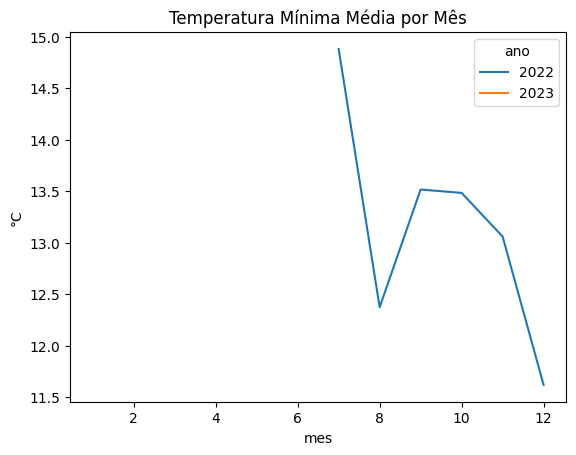

In [13]:
monthly_temps = df.groupby(['ano','mes'])[['temperatura_min', 'temperatura_max']].mean().reset_index()
pivot = monthly_temps.pivot(index='mes', columns='ano', values='temperatura_min')
pivot.plot(title='Temperatura Mínima Média por Mês')
plt.ylabel('°C')
plt.show()

## Precipitação Total por Mês

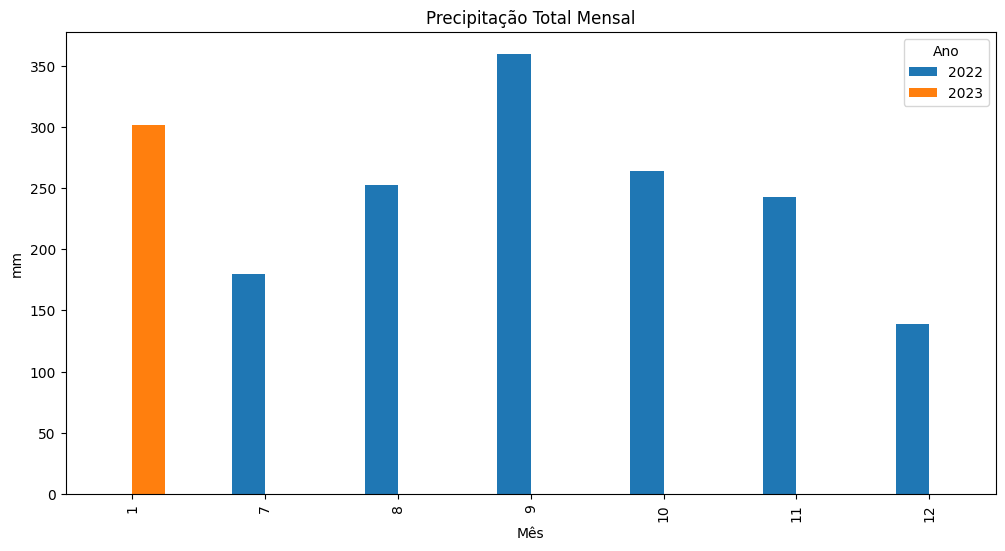

In [14]:
monthly_prec = df.groupby(['ano','mes'])['precipitacao'].sum().unstack()
monthly_prec.T.plot(kind='bar', figsize=(12,6), title='Precipitação Total Mensal')
plt.ylabel('mm')
plt.xlabel('Mês')
plt.legend(title='Ano')
plt.show()

## Frequência de Eventos Adversos

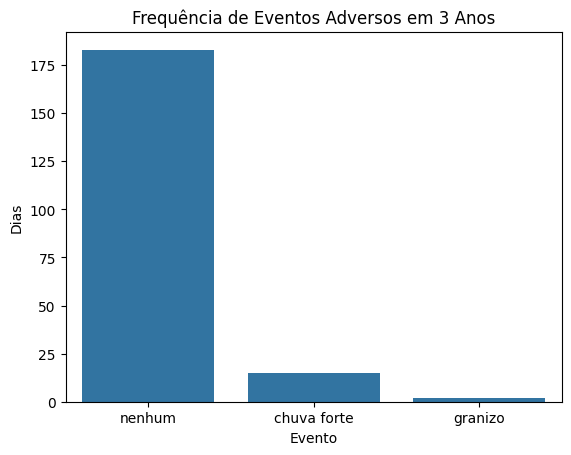

In [15]:
eventos = df['evento_adverso'].value_counts()
sns.barplot(x=eventos.index, y=eventos.values)
plt.title('Frequência de Eventos Adversos em 3 Anos')
plt.ylabel('Dias')
plt.xlabel('Evento')
plt.show()

## Comparação entre Clima da Fazenda e Condições Ideais de Cultivos

Abaixo está uma análise qualitativa entre os dados observados e os parâmetros ideais para algumas culturas.

**Temperatura Média Anual Observada:**
- Cálculo da média anual de temperatura mínima e máxima, comparada com os requisitos de cada cultura.

**Precipitação Anual Observada:**
- Somatório por ano comparado com a necessidade hídrica de cada cultura.

**Horas de Frio Estimadas:**
- Considera-se um dia com temperatura mínima ≤ 7.2°C como 1 hora de frio.
- Essa aproximação ajuda a verificar se culturas como maçã ou pêssego são viáveis.


In [16]:
# Temperaturas médias anuais
df['temp_media'] = (df['temperatura_min'] + df['temperatura_max']) / 2
temp_anual = df.groupby('ano')['temp_media'].mean()
print('Temperatura média anual por ano (°C):')
print(temp_anual)

# Precipitação total anual
prec_anual = df.groupby('ano')['precipitacao'].sum()
print('Precipitação total anual (mm):')
print(prec_anual)

# Estimativa de horas de frio: contar dias com temperatura mínima <= 7.2°C
df['horas_frio_estimadas'] = df['temperatura_min'].apply(lambda x: 1 if x <= 7.2 else 0)
frio_ano = df.groupby('ano')['horas_frio_estimadas'].sum()
print('Horas de frio estimadas por ano (dias com Tmin ≤ 7.2°C):')
print(frio_ano)

Temperatura média anual por ano (°C):
ano
2022    18.091714
2023    18.094000
Name: temp_media, dtype: float64
Precipitação total anual (mm):
ano
2022    1438.1
2023     301.8
Name: precipitacao, dtype: float64
Horas de frio estimadas por ano (dias com Tmin ≤ 7.2°C):
ano
2022    22
2023     5
Name: horas_frio_estimadas, dtype: int64


## Aderência Climática por Cultura

Abaixo, analisamos a compatibilidade dos dados observados com os requisitos básicos de algumas culturas.
Critérios básicos simplificados usados:
- Temperatura média anual (ideal: faixa da cultura)
- Precipitação anual (ideal: mínimo necessário)
- Horas de frio (dias com Tmin ≤ 7.2°C)

### Resultado:
*Alto*: Requisitos atendidos de forma consistente
*Moderado*: Requisitos atendidos parcialmente ou com variabilidade
*Baixo*: Condições não atendidas regularmente


In [17]:
culturas = [
    {'nome': 'Uva (vinho)', 't_min': 13, 't_max': 22, 'prec_min': 600, 'frio': False},
    {'nome': 'Maçã', 't_min': 10, 't_max': 20, 'prec_min': 800, 'frio': True, 'frio_min': 500},
    {'nome': 'Batata', 't_min': 15, 't_max': 20, 'prec_min': 600, 'frio': False},
    {'nome': 'Milho', 't_min': 20, 't_max': 30, 'prec_min': 600, 'frio': False},
    {'nome': 'Soja', 't_min': 20, 't_max': 30, 'prec_min': 600, 'frio': False},
    {'nome': 'Pêssego', 't_min': 15, 't_max': 25, 'prec_min': 800, 'frio': True, 'frio_min': 300},
    {'nome': 'Caqui', 't_min': 18, 't_max': 28, 'prec_min': 700, 'frio': False},
    {'nome': 'Morango', 't_min': 15, 't_max': 25, 'prec_min': 700, 'frio': False},
    {'nome': 'Alho', 't_min': 15, 't_max': 25, 'prec_min': 700, 'frio': False},
    {'nome': 'Pinus', 't_min': 10, 't_max': 28, 'prec_min': 700, 'frio': False},
    {'nome': 'Eucalipto', 't_min': 15, 't_max': 30, 'prec_min': 700, 'frio': False},
]

# Cálculo de médias reais
media_temp = df['temp_media'].mean()
media_prec = df.groupby('ano')['precipitacao'].sum().mean()
media_frios = df.groupby('ano')['horas_frio_estimadas'].sum().mean()

print(f'Temperatura média anual: {media_temp:.1f}°C')
print(f'Precipitação média anual: {media_prec:.0f} mm')
print(f'Média anual de dias com frio (Tmin ≤ 7.2°C): {media_frios:.0f} dias')

def classificar(c):
    aderencia = 'Alto'
    if not (c['t_min'] <= media_temp <= c['t_max']):
        aderencia = 'Moderado'
    if media_prec < c['prec_min']:
        aderencia = 'Moderado' if aderencia == 'Alto' else 'Baixo'
    if c['frio']:
        if media_frios < c['frio_min']:
            aderencia = 'Moderado' if aderencia == 'Alto' else 'Baixo'
    return aderencia

resultados = [(c['nome'], classificar(c)) for c in culturas]

for nome, status in resultados:
    print(f'{nome:<20} → {status}')

Temperatura média anual: 18.1°C
Precipitação média anual: 870 mm
Média anual de dias com frio (Tmin ≤ 7.2°C): 14 dias
Uva (vinho)          → Alto
Maçã                 → Moderado
Batata               → Alto
Milho                → Moderado
Soja                 → Moderado
Pêssego              → Moderado
Caqui                → Alto
Morango              → Alto
Alho                 → Alto
Pinus                → Alto
Eucalipto            → Alto


# 🎮 Simulador de Rodadas Interativas de Cultivo

Neste modo, você jogará como o **Agrônomo Mestre** e tomará decisões a cada rodada com base em dados climáticos reais da fazenda.

Cada rodada representa uma **estação do ano**. Com base no clima recente, você escolherá a cultura ideal para plantar.

**Pontuação por rodada:**
- 🌾 Escolha compatível com clima → +50 pts
- 🌦️ Adaptação ao evento climático adverso → +25 pts
- 💰 Rentabilidade estimada (simulada) → +50 a +100 pts

Vamos começar a simular?

In [18]:
import random

# Definição de culturas simplificadas com dados estimados
culturas = {
    'Uva': {'t_min': 13, 't_max': 25, 'prec_min': 600, 'lucro_base': 80},
    'Soja': {'t_min': 20, 't_max': 30, 'prec_min': 600, 'lucro_base': 70},
    'Milho': {'t_min': 20, 't_max': 30, 'prec_min': 600, 'lucro_base': 65},
    'Batata': {'t_min': 15, 't_max': 22, 'prec_min': 600, 'lucro_base': 60},
    'Morango': {'t_min': 15, 't_max': 25, 'prec_min': 700, 'lucro_base': 90}
}

# Função para jogar uma rodada
def jogar_rodada(estacao, temp, prec, evento):
    print(f"\n🌱 Estação: {estacao}")
    print(f"🌡️ Temperatura média: {temp} °C | 🌧️ Precipitação: {prec} mm")
    print(f"⚠️ Evento adverso: {evento if evento else 'Nenhum'}")
    print("\nCulturas disponíveis: " + ', '.join(culturas.keys()))
    escolha = input("👉 Escolha a cultura para plantar: ").strip()

    if escolha not in culturas:
        print("❌ Cultura inválida. Você perdeu a rodada.")
        return 0

    c = culturas[escolha]
    pontos = 0

    if c['t_min'] <= temp <= c['t_max'] and prec >= c['prec_min']:
        pontos += 50
    else:
        pontos += 20

    if evento:
        if escolha in ['Batata', 'Morango'] and evento == 'chuva forte':
            pontos += 10  # resistem moderadamente
        elif escolha == 'Uva' and evento == 'granizo':
            pontos -= 20  # perde rendimento
        else:
            pontos += 5

    lucro = c['lucro_base'] + random.randint(-10, 20)
    pontos += lucro // 2

    print(f"✅ Pontuação da rodada: {pontos} pts (lucro estimado: R${lucro} por ha)")
    return pontos

# Simulação de rodada aleatória
estacoes = ['Primavera', 'Verão', 'Outono', 'Inverno']
eventos = [None, None, 'chuva forte', 'granizo', 'geada']
total_pts = 0

for i in range(4):
    est = estacoes[i]
    temp = round(random.uniform(13, 30), 1)
    prec = random.randint(400, 1200)
    evento = random.choice(eventos)
    total_pts += jogar_rodada(est, temp, prec, evento)

print(f"\n🎯 Pontuação total final após 4 estações: {total_pts} pontos")


🌱 Estação: Primavera
🌡️ Temperatura média: 16.8 °C | 🌧️ Precipitação: 455 mm
⚠️ Evento adverso: granizo

Culturas disponíveis: Uva, Soja, Milho, Batata, Morango
👉 Escolha a cultura para plantar: uva
❌ Cultura inválida. Você perdeu a rodada.

🌱 Estação: Verão
🌡️ Temperatura média: 22.9 °C | 🌧️ Precipitação: 789 mm
⚠️ Evento adverso: granizo

Culturas disponíveis: Uva, Soja, Milho, Batata, Morango
👉 Escolha a cultura para plantar: Soja
✅ Pontuação da rodada: 97 pts (lucro estimado: R$85 por ha)

🌱 Estação: Outono
🌡️ Temperatura média: 27.6 °C | 🌧️ Precipitação: 509 mm
⚠️ Evento adverso: Nenhum

Culturas disponíveis: Uva, Soja, Milho, Batata, Morango
👉 Escolha a cultura para plantar: Wakter
❌ Cultura inválida. Você perdeu a rodada.

🌱 Estação: Inverno
🌡️ Temperatura média: 19.3 °C | 🌧️ Precipitação: 859 mm
⚠️ Evento adverso: Nenhum

Culturas disponíveis: Uva, Soja, Milho, Batata, Morango
👉 Escolha a cultura para plantar: Batata
✅ Pontuação da rodada: 76 pts (lucro estimado: R$53 por ha)
